## Example plotting following [ASP Docs Section 4.2](https://stereopipeline.readthedocs.io/en/latest/tutorial.html#example-using-mars-moc-images) for Mars Global Surveyor (MGS) Mars Orbital Camera (MOC)

Below are example `asp_plot` outputs following the processing in ASP Docs Mars MOC example [Section 4.2](https://stereopipeline.readthedocs.io/en/latest/tutorial.html#example-using-mars-moc-images).

Retrieve `.imq` files [from the ASP example files](https://github.com/NeoGeographyToolkit/StereoPipeline/tree/master/examples/MOC):

---

[Install ISIS](https://astrogeology.usgs.gov/docs/how-to-guides/environment-setup-and-maintenance/installing-isis-via-anaconda/#installing-isis) and pre-process the images for stereo:

```bash
ISIS> mocproc from=M0100115.imq to=M0100115.cub Mapping=NO
ISIS> mocproc from=E0201461.imq to=E0201461.cub Mapping=NO
```

---

Run stereo processing, using [the ASP-provided `stereo.default.example` file](https://github.com/NeoGeographyToolkit/StereoPipeline/blob/master/stereo.default.example). This must be done in an ISIS-enabled session:

```bash
ISIS> parallel_stereo               \
  --alignment-method affineepipolar \
  -s stereo.default.example         \
  E0201461.cub M0100115.cub         \
  results/output
```

---

Run point2dem to produce DEM:

```bash
ISIS> point2dem --auto-proj-center \
  results/output-PC.tif
```

## Full report

Example command for full stereo-processing report

In [1]:
directory = "/Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_4_2_mars_MOC/"
stereo_directory = "results/"

In [2]:
!asp_plot \
  --directory $directory \
  --stereo_directory $stereo_directory \
  --subset_km 0.1 \
  --add_basemap False \
  --plot_icesat False \
  --plot_geometry False


Processing ASP files in /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_4_2_mars_MOC/


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.



ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_4_2_mars_MOC/results/output-DEM.tif


Using map projection from DEM: EPSG:None


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.



ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_4_2_mars_MOC/results/output-DEM.tif


Intersection error file not found. Plotting hillshade without details.


Figure saved to /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_4_2_mars_MOC/tmp_asp_report_plots/00.png
Plotting DEM results. This can take a minute for

## Individual plots

Example modular usage of `asp_plot` for this example processing.

### Processing Parameters

In [3]:
%load_ext autoreload
%autoreload 2

from asp_plot.processing_parameters import ProcessingParameters

In [4]:
processing_parameters = ProcessingParameters(
    processing_directory=directory,
    stereo_directory=stereo_directory
)
processing_parameters_dict = processing_parameters.from_log_files()

print(f"Processed on: {processing_parameters_dict['processing_timestamp']}\n")

print(f"Reference DEM: {processing_parameters_dict['reference_dem']}\n")

print(f"Bundle adjustment ({processing_parameters_dict['bundle_adjust_run_time']}):\n")
print(processing_parameters_dict["bundle_adjust"])

print(f"\nStereo ({processing_parameters_dict['stereo_run_time']}):\n")
print(processing_parameters_dict["stereo"])

print(f"\nPoint2dem ({processing_parameters_dict['point2dem_run_time']}):\n")
print(processing_parameters_dict["point2dem"])

Processed on: 2025-10-19 11:20:03

Reference DEM: 

Bundle adjustment (N/A):

Bundle adjustment not run

Stereo (0 hours and 2 minutes):

stereo --alignment-method affineepipolar E0201461.cub M0100115.cub results/output --corr-seed-mode 1 --stereo-file stereo.default.example --sgm-collar-size 0 --compute-point-cloud-center-only --threads 8

Point2dem (0 hours and 0 minutes):

point2dem --auto-proj-center results/output-PC.tif


### Scene Plots

In [5]:
from asp_plot.scenes import ScenePlotter

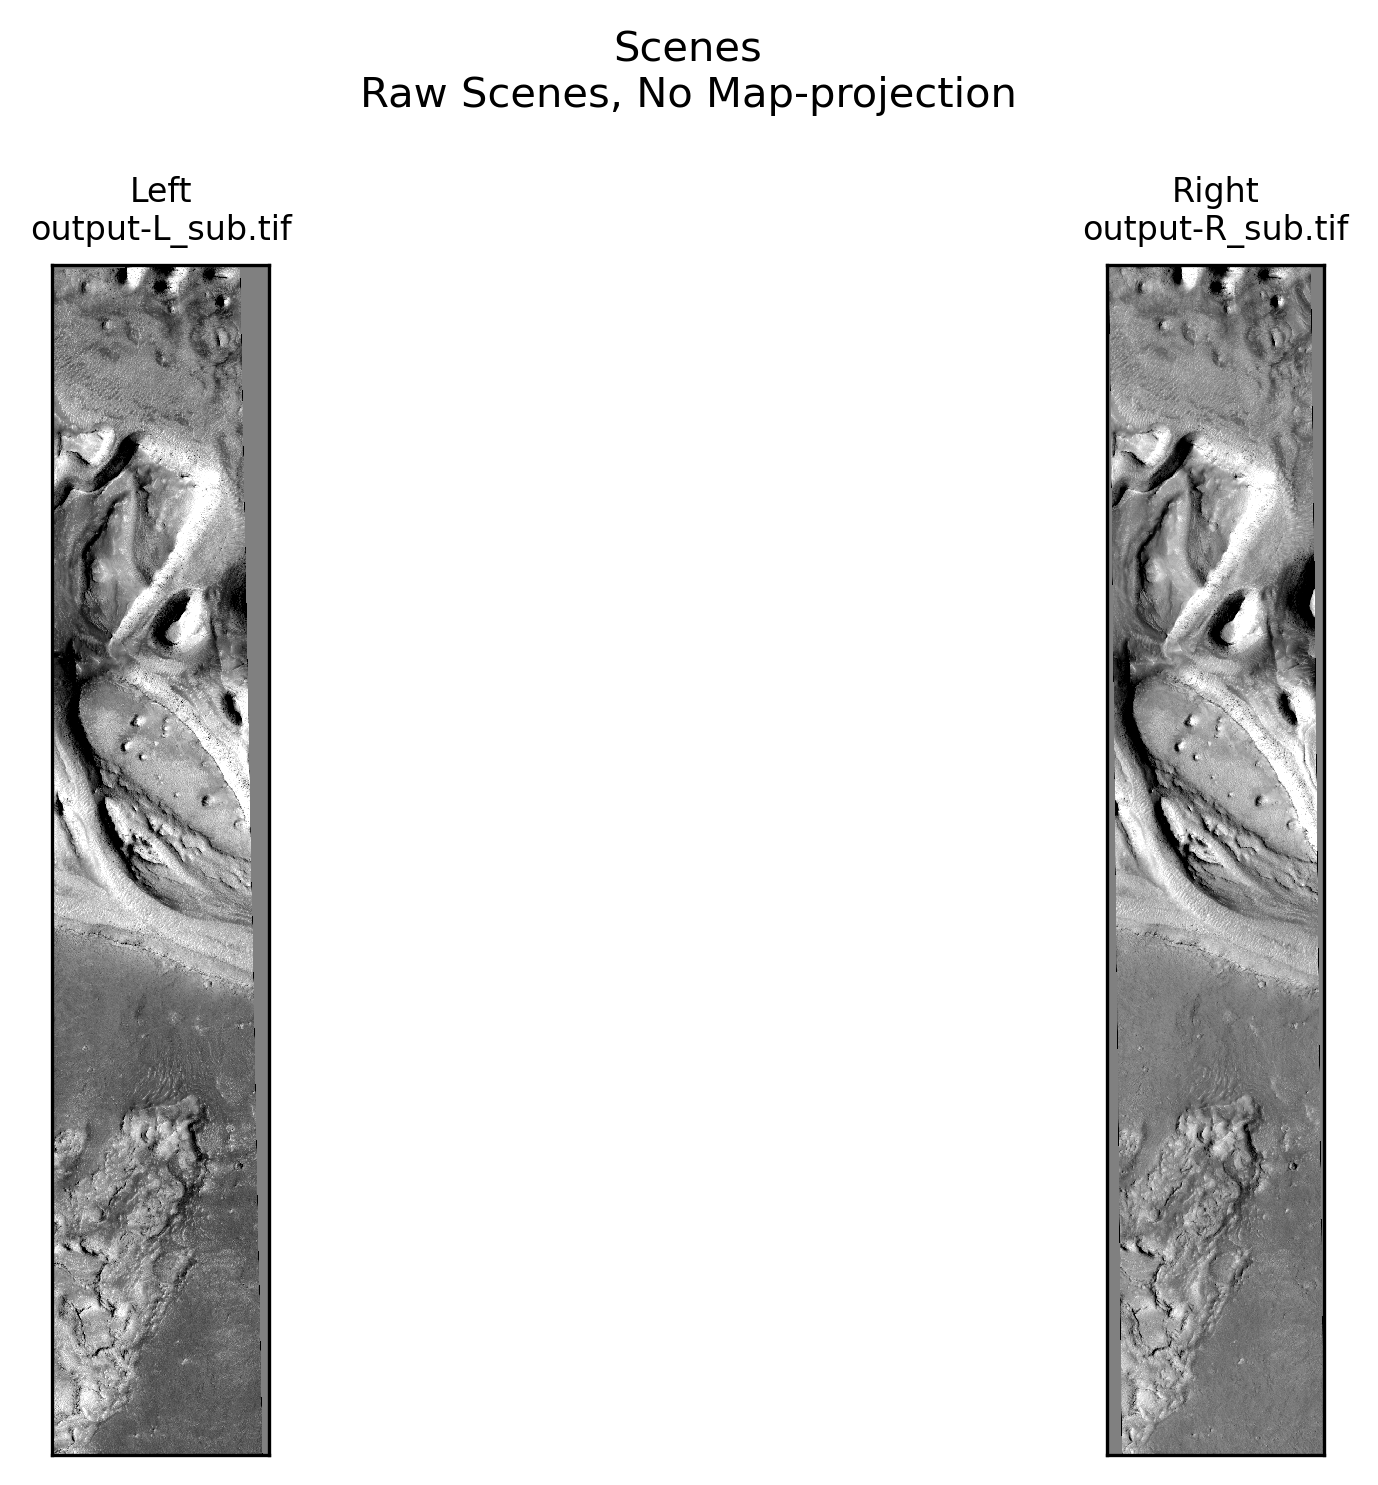

In [6]:
plotter = ScenePlotter(
  directory,
  stereo_directory,
  title="Scenes"
)

plotter.plot_scenes()

### Stereo Plots

In [7]:
from asp_plot.stereo import StereoPlotter

In [8]:
plotter = StereoPlotter(
  directory, 
  stereo_directory
)


No reference DEM found in log files. Please supply the reference DEM you used during stereo processing (or another reference DEM) if you would like to see some difference maps.





ASP DEM: /Users/ben/Dropbox/UW_Shean/asp_plot-test_data/docs_examples/docs_sect_4_2_mars_MOC/results/output-DEM.tif




Intersection error file not found. Plotting hillshade without details.


/Users/ben/miniconda3/envs/asp_plot/lib/python3.13/site-packages/osgeo/gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


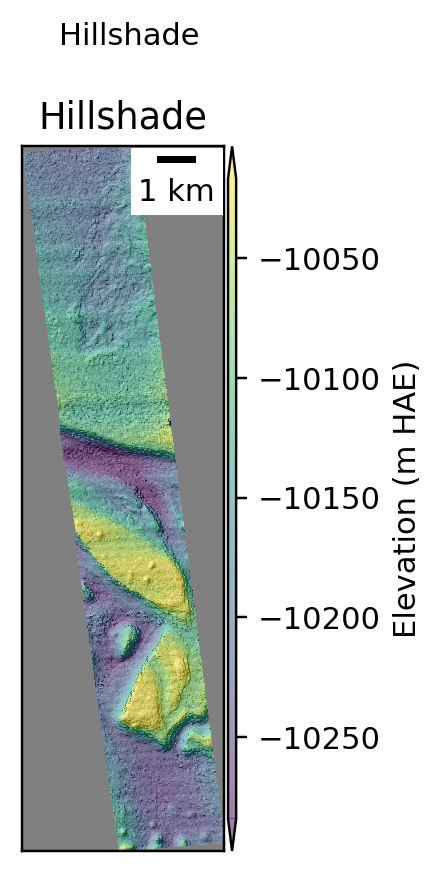

In [9]:
plotter.title = "Hillshade"

plotter.plot_detailed_hillshade()

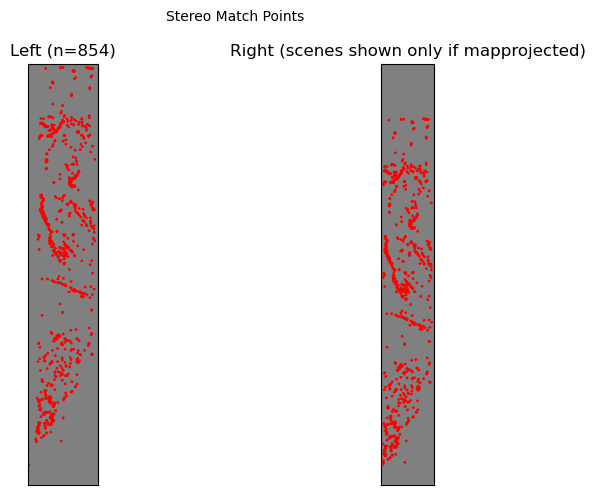

In [10]:
plotter.title="Stereo Match Points"

plotter.plot_match_points()

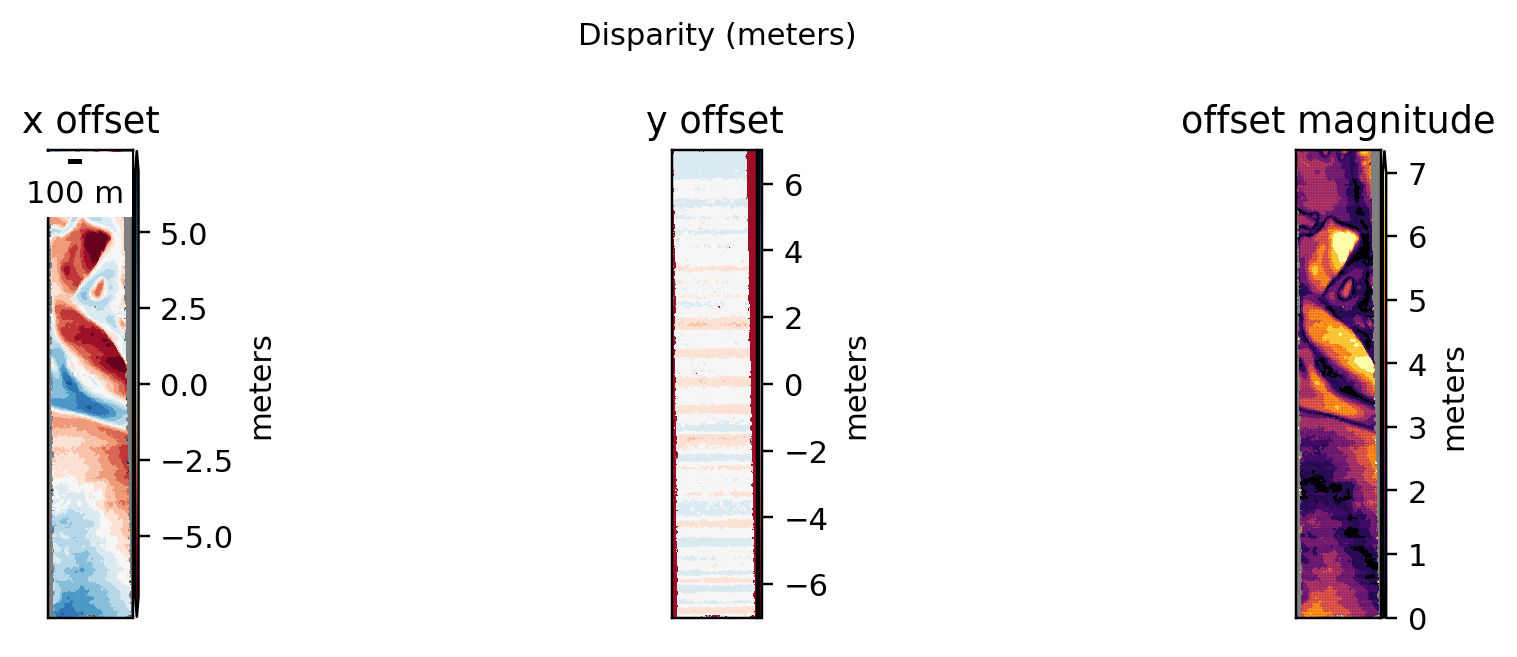

In [11]:
plotter.title = "Disparity (meters)"

plotter.plot_disparity(
  unit="meters",
  quiver=True,
)

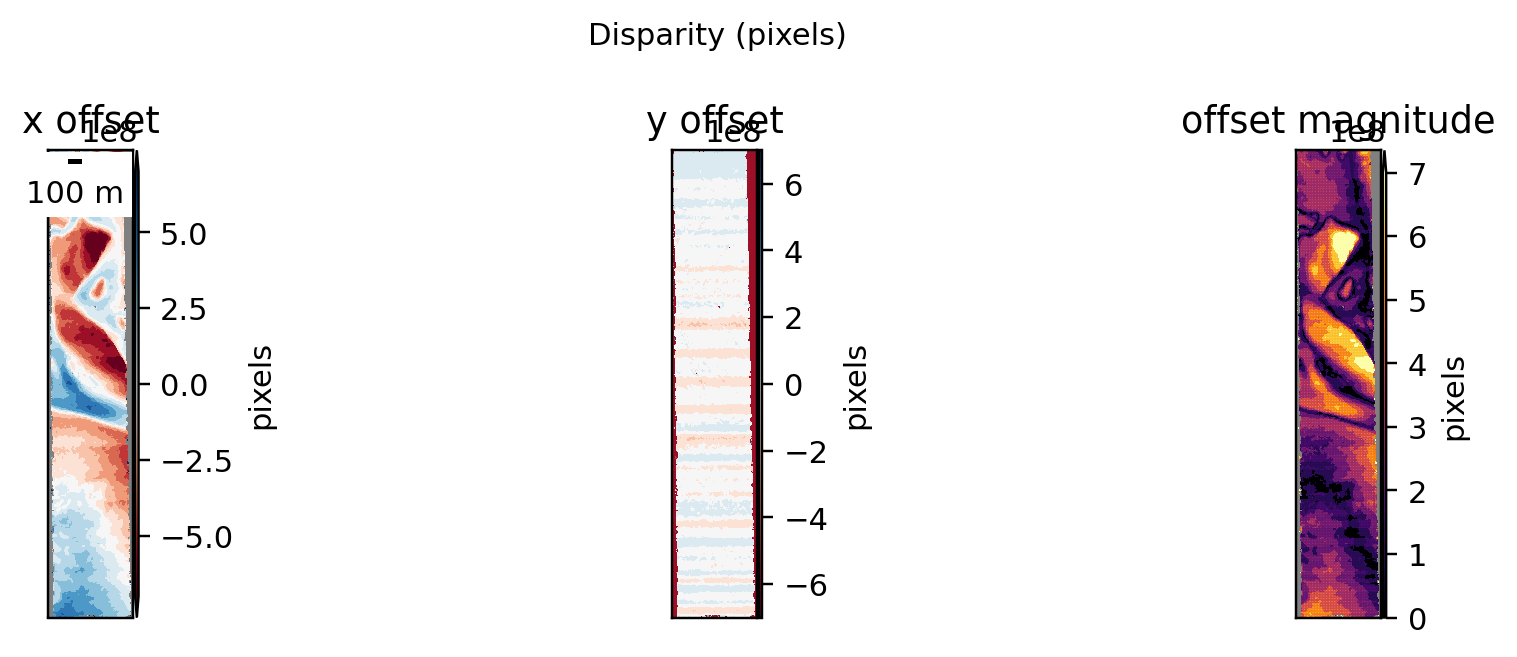

In [12]:
plotter.title = "Disparity (pixels)"

plotter.plot_disparity(
  unit="pixels",
  quiver=True,
)

Plotting DEM results. This can take a minute for large inputs.


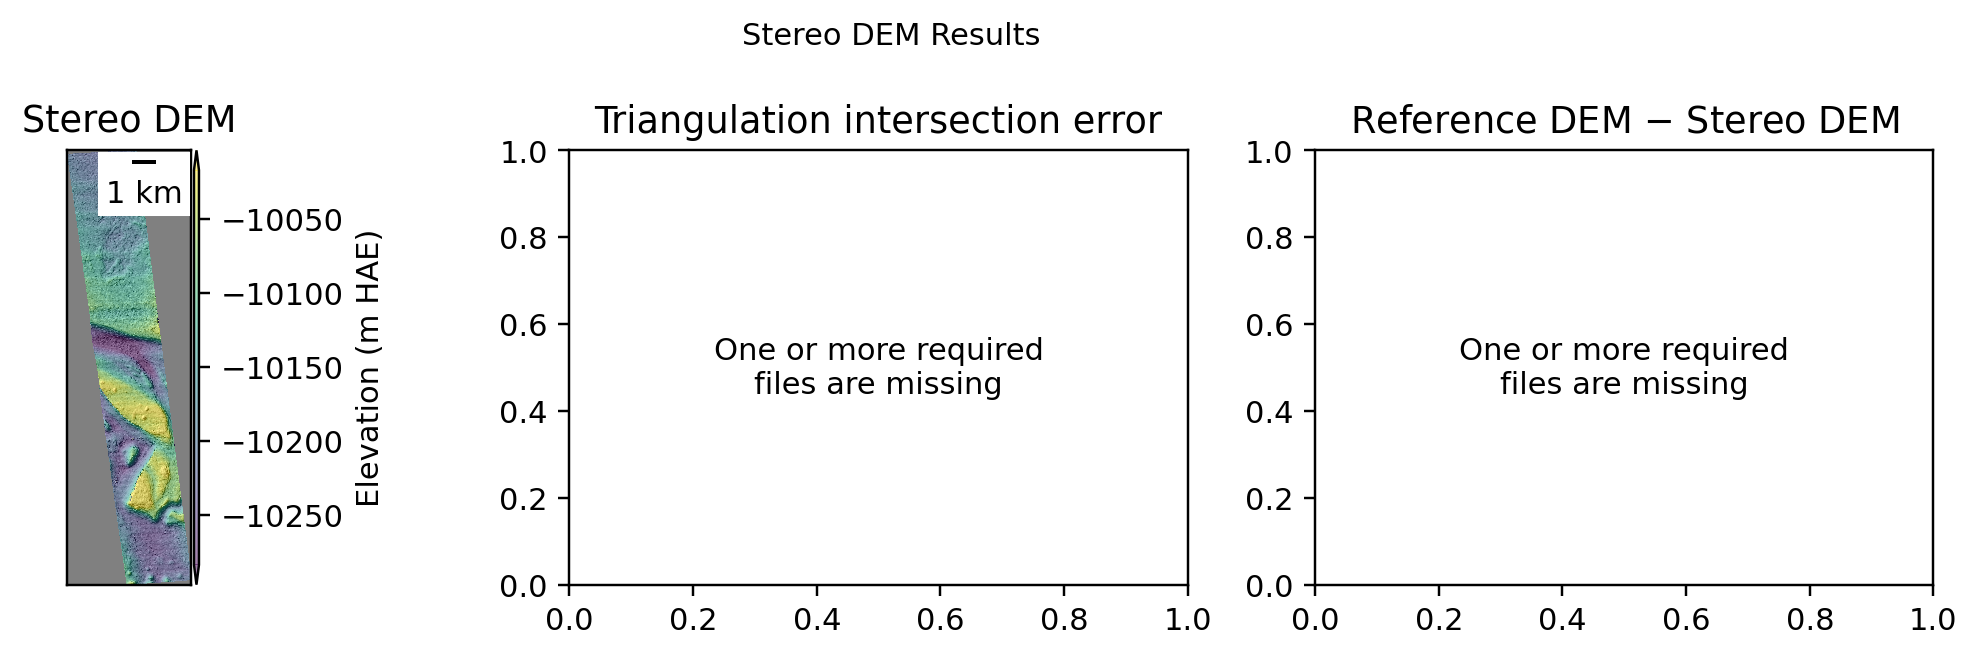

In [13]:
plotter.title = "Stereo DEM Results"

plotter.plot_dem_results()